In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import joblib
import sys
from glob import glob 
import random

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.collections import LineCollection
from shapely.errors import ShapelyDeprecationWarning
import warnings
warnings.simplefilter("ignore", category=ShapelyDeprecationWarning)





sys.path.append('/home/freimax/msc_thesis/scripts/random_forest/')
import rf_functions

sys.path.append('/home/freimax/msc_thesis/scripts/helpers/')
import helper
import data_preprocessing_helpers
from data_preprocessing_helpers import get_cross_section_data

sys.path.append('/home/freimax/msc_thesis/scripts/plotting_functions/')
import plot_helpers
import make_plots_traj
from plot_crossec_fct import plot_cross_section
from plot_crosec_rf_evaluation import plot_crossec_rf_eval

sys.path.append('/home/freimax/msc_thesis/scripts/random_forest/')
import rf_functions

sys.path.append('/home/freimax/msc_thesis/scripts/IFS-18/')
import traj_processing_functions

sys.path.append('/home/freimax/msc_thesis/scripts/plotting_functions/')
import plot_helpers
import make_plots_traj

In [3]:
model_tsubsi, model_tmeltsi, model_tevr = helper.load_rf_models()

                   *** Load Models ***                    
  Load model tsubsi
  Load model tmeltsi
  Load model tevr


In [4]:
# ## Load ifs files
# # path_ifs = '/net/thermo/atmosdyn/atroman/PAC1d/cdf/2017/04'
# path_ifs = '/net/thermo/atmosdyn/atroman/PAC1d/cdf'
# path_era = '/net/thermo/atmosdyn/era5/cdf/2017/04'

# date_list = ['20170409_15','20170410_03','20170410_16']

# lon_range,lat_range = [130,-150], [20,60]

# ## IFS
# paths_p_ifs = [f'{path_ifs}/P{date}' for date in date_list]
# paths_s_ifs = [f'{path_ifs}/S{date}' for date in date_list]

# print('Load and Process IFS')
# # ds_p = xr.load_dataset(f'{path_ifs}/P{date}')
# dropvars_list=[ 'tfrz','trime','udotconv','vdotconv','udotmix','vdotmix','tls','tce', 'BLH','tsw','tlw','tmix','tconv','tcond','tdep','tbf','tevc',]
# ds_p = xr.open_mfdataset(paths_p_ifs, drop_variables=dropvars_list)
# # ds_s = xr.load_dataset(f'{path_ifs}/S{date}')
# ds_s = xr.open_mfdataset(paths_s_ifs)
# # Create lon and lat arrays based on the resolution provided
# lon = np.linspace(-180, 180, ds_s.dimx_PS.size, endpoint=True)
# lat = np.linspace(-90, 90, ds_s.dimy_PS.size, endpoint=True) 
# # Replace existing coordinates and rename them
# ds_s = ds_s.assign_coords({'dimx_PS': lon, 'dimy_PS': lat})
# ds_s = ds_s.rename({'dimx_PS': 'lon', 'dimy_PS': 'lat', 'dimz_P':'lev'})


# ds_ifs = ds_p.copy()
# ds_ifs['THE'] = ds_s['THE'].assign_coords(ds_ifs.coords)
# ds_ifs['TH'] = ds_s['TH'].assign_coords(ds_ifs.coords)
# ds_ifs['RH'] = ds_s['RH'].assign_coords(ds_ifs.coords)
# ds_ifs['SIWC']   = ds_ifs['SWC']   + ds_ifs['IWC']
# ds_ifs['total_precip'] = (ds_ifs['LSP'] + ds_ifs['CP']).where((ds_ifs['LSP'] + ds_ifs['CP'])>=0.2)
# ds_ifs['tsubsi'] = ds_ifs['tsubi'] + ds_ifs['tsubs']
# ds_ifs['tmeltsi']= ds_ifs['tmelti']+ ds_ifs['tmelts']
# ds_ifs = ds_ifs.drop_vars(['tsubs', 'tsubi', 'tmelts','tmelti'])
# ds_ifs = ds_ifs.squeeze()
# ds_ifs = data_preprocessing_helpers.get_lonlatbox(ds_ifs, lon_range=lon_range, lat_range=lat_range)

# ## Make predictions for corss-section data
# features = ['SIWC','LWC','RWC','RH','Q','OMEGA','T']
# tsubsi_pred = rf_functions.make_predictions( ds_ifs, model_tsubsi , water_type='SIWC', feature_names=features, type_filteredvalues='nan', add_temp_filter=False)
# tmeltsi_pred = rf_functions.make_predictions(ds_ifs, model_tmeltsi, water_type='SIWC', feature_names=features, type_filteredvalues='nan', add_temp_filter=True)
# tevr_pred = rf_functions.make_predictions(   ds_ifs, model_tevr   , water_type='RWC' , feature_names=features, type_filteredvalues='nan', add_temp_filter=False)

# ds_ifs['tsubsi_pred'] = tsubsi_pred.assign_coords(ds_ifs.coords)
# ds_ifs['tmeltsi_pred']= tmeltsi_pred.assign_coords(ds_ifs.coords)
# ds_ifs['tevr_pred']   = tevr_pred.assign_coords(ds_ifs.coords)




# # ERA5
# print('\n================================================================================================')
# print('Load and process ERA5')
# # ds_p_era = xr.load_dataset(f'{path_era}/P{date}')
# paths_p_era = [f'{path_era}/P{date}' for date in date_list]
# ds_p_era = xr.open_mfdataset(paths_p_era)
# # ds_s_era = xr.load_dataset(f'{path_era}/S{date}')
# paths_s_era = [f'{path_era}/S{date}' for date in date_list]
# ds_s_era = xr.open_mfdataset(paths_s_era)
# ## Load B file for SLP
# paths_b_era = [f'{path_era}/B{date}' for date in date_list]
# dropvar_list2 = ['PS','TCC','U10M','V10M','SSTK','CI','D2M','T2M','TCW','TCWV','VIWVD','E','MN2T','MX2T','SI','TTR','TTRC','WG10','LSP','CP','SF','SSHF','SLHF','BLH']
# slp_era = xr.open_mfdataset(paths_b_era, drop_variables=dropvar_list2)

# ds_era = ds_p_era.copy()
# ds_era['THE'] = ds_s_era['THE'].assign_coords(ds_era.coords)
# ds_era['TH'] = ds_s_era['TH'].assign_coords(ds_era.coords)
# ds_era['RH']  = ds_s_era['RH'].assign_coords(ds_era.coords)
# ds_era['SLP'] = slp_era['MSL']/100
# ds_era['T']   = ds_era['T']-273.15
# ds_era['RWC'] = ds_era['RWC']*1000
# ds_era['SWC'] = ds_era['SWC']*1000
# ds_era['IWC'] = ds_era['IWC']*1000
# ds_era['SIWC'] = ds_era['SWC'] + ds_era['IWC']
# ds_era['LWC'] = ds_era['LWC']*1000
# ds_era['total_precip'] = ((ds_era['LSP']*1000 + ds_era['CP']*1000).where((ds_era['LSP']*1000 + ds_era['CP']*1000)>=0.2))
# ds_era = ds_era.squeeze()
# ds_era = data_preprocessing_helpers.get_lonlatbox(ds_era, lon_range=lon_range, lat_range=lat_range)

# ## Make predictions for corss-section data
# features = ['SIWC','LWC','RWC','RH','Q','OMEGA','T']
# tsubsi_pred = rf_functions.make_predictions( ds_era, model_tsubsi , water_type='SIWC', feature_names=features, type_filteredvalues='nan', add_temp_filter=False)
# tmeltsi_pred = rf_functions.make_predictions(ds_era, model_tmeltsi, water_type='SIWC', feature_names=features, type_filteredvalues='nan', add_temp_filter=True)
# tevr_pred = rf_functions.make_predictions(   ds_era, model_tevr   , water_type='RWC' , feature_names=features, type_filteredvalues='nan', add_temp_filter=False)

# ds_era['tsubsi_pred'] = tsubsi_pred.assign_coords(ds_era.coords)
# ds_era['tmeltsi_pred']= tmeltsi_pred.assign_coords(ds_era.coords)
# ds_era['tevr_pred']   = tevr_pred.assign_coords(ds_era.coords)


# ## Calculate 3d pressure fields (pressure between all the model-levels)
# hya_cut = ds_p_era.hyam.isel(time=0).values[np.arange((137-ds_era.lev.shape[0]),137)]
# hyb_cut = ds_p_era.hybm.isel(time=0).values[np.arange((137-ds_era.lev.shape[0]),137)]


# ## Calculate 3d pressure fields (pressure between all the model-levels)
# pres_field3d_ifs = data_preprocessing_helpers.PRES_3d(ds_ifs, shape_var=ds_ifs['T'])
# ## Interpolate variables to pressure levels
# ds_ifs_pres = data_preprocessing_helpers.interpolate_pres(data=ds_ifs, pres_field=pres_field3d_ifs, pressure_levels=np.arange(1020,190,-10))
# ds_ifs_pres['SLP'] = ds_ifs['SLP']

# pres_field3d_era = data_preprocessing_helpers.PRES_3d_era5(data_set_PS=ds_era, shape_var=ds_era['T'], hya=hya_cut, hyb=hyb_cut)
# ## Interpolate variables to pressure levels
# ds_era_pres = data_preprocessing_helpers.interpolate_pres(data=ds_era, pres_field=pres_field3d_era, pressure_levels=np.arange(1030,190,-10))
# ds_era_pres['SLP'] = ds_era['SLP']


In [5]:
# ## Make predictions for corss-section data
# features = ['SIWC', 'LWC', 'RWC', 'RH', 'Q', 'OMEGA', 'T']
# tsubsi_pred = rf_functions.make_predictions(ds_ifs, model_tsubsi, water_type='SIWC', feature_names=features, type_filteredvalues='nan', add_temp_filter=False)
# tmeltsi_pred = rf_functions.make_predictions(ds_ifs, model_tmeltsi, water_type='SIWC', feature_names=features, type_filteredvalues='nan', add_temp_filter=True)
# tevr_pred = rf_functions.make_predictions(ds_ifs, model_tevr, water_type='RWC', feature_names=features, type_filteredvalues='nan', add_temp_filter=False)

In [6]:
# print(ds_ifs['tsubsi_pred'].min().values)
# print(ds_ifs['tmeltsi_pred'].min().values)
# print(ds_ifs['tevr_pred'].min().values)

In [7]:
# def print_feature_range(ds1, ds2):
#     print(f'SIWC:\t{ds1.SIWC.max().values:.2}\t\tSIWC:\t{ ds2.SIWC.max().values:.2f} ')
#     print(f'LWC:\t{ds1.LWC.max().values:.2f}\t\tLWC:\t{  ds2.LWC.max().values:.2f}  ')
#     print(f'RWC:\t{ds1.RWC.max().values:.2f}\t\tRWC:\t{  ds2.RWC.max().values:.2f}  ')
#     print(f'RH:\t{ds1.RH.max().values:.2f}\t\tRH:\t{   ds2.RH.max().values:.2f}   ')
#     print(f'Q:\t{ds1.Q.max().values:.2f}\t\tQ:\t{    ds2.Q.max().values:.2f}    ')
#     print(f'Temp:\t{ds1["T"].max().values:.2f}\t\tTemp:\t{ ds2["T"].max().values:.2f} ')
#     print(f'OMEGA:\t{ds1.OMEGA.max().values:.2f}\t\tOMEGA:\t{ds2.OMEGA.max().values:.2f}')
# print_feature_range(ds_ifs, ds_era)

In [8]:
## Load ifs trajecotries
path_ifs_traj = '/net/helium/atmosdyn/freimax/data_msc/casestudy_ra/IFS-17/df_big_ifs17.h5'
df_traj_ifs = pd.read_hdf(path_ifs_traj, 'df')
path_era_traj = '/net/helium/atmosdyn/freimax/data_msc/casestudy_ra/ERA5/df_big_era.h5'
df_traj_era = pd.read_hdf(path_era_traj, 'df')

In [7]:
df_traj_ifs.describe()

,time,lon,lat,p,tmeltsi_pred,tsubsi_pred,tevr_pred,Atmeltsi_pred,Atsubsi_pred,Atevr_pred,...,PS,Q,T,RWC,LWC,OMEGA,RH,SIWC,NOBCP_FLAG,id_CYC
count,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,...,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.000000,99029.0,99029.0
mean,-24.000000,157.826358,47.302448,930.410344,-0.014911,-0.077078,-0.000907,-0.266567,-1.642485,-0.030239,...,996.275435,0.002788,-2.732822,0.001662,0.011445,-0.041649,80.023080,0.045550,0.0,1.0
std,14.142207,28.493033,3.163549,76.827086,0.079586,0.131317,0.014103,0.943767,1.819948,0.171784,...,12.827649,0.000984,4.533313,0.010492,0.028378,0.205473,17.407317,0.083081,0.0,0.0
min,-48.000000,-179.990000,32.760000,424.000000,-1.642520,-1.620212,-0.993164,-10.664227,-9.249792,-2.906193,...,885.813000,0.000000,-47.629000,0.000000,0.000000,-1.561000,1.653000,0.000000,0.0,1.0
25%,-36.000000,157.190000,45.490000,904.000000,0.000000,-0.085459,0.000000,-0.000370,-2.531744,0.000000,...,988.048000,0.002000,-4.968000,0.000000,0.000000,-0.075000,72.868000,0.000000,0.0,1.0
50%,-24.000000,161.470000,46.820000,957.000000,0.000000,-0.025659,0.000000,0.000000,-0.977908,0.000000,...,999.852000,0.003000,-1.658000,0.000000,0.000000,-0.009000,84.300000,0.005000,0.0,1.0
75%,-12.000000,164.460000,48.200000,985.000000,0.000000,0.000000,0.000000,0.000000,-0.180798,0.000000,...,1005.973000,0.003000,0.346000,0.000000,0.006000,0.040000,92.169000,0.048000,0.0,1.0
max,0.000000,179.990000,61.280000,1020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1022.210000,0.010000,15.972000,0.319000,0.330000,1.854000,104.209000,0.623000,0.0,1.0


In [8]:
df_traj_era.describe()

,time,lon,lat,p,tmeltsi_pred,tsubsi_pred,tevr_pred,Atmeltsi_pred,Atsubsi_pred,Atevr_pred,...,PV,LWC,RWC,Q,RH,T,OMEGA,SIWC,NOBCP_FLAG,id_CYC
count,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,...,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.000000,22442.0,22442.0
mean,-24.000000,162.171403,46.648658,947.492336,-0.024949,-0.120903,-0.002399,-0.590239,-2.314287,-0.088172,...,0.553085,0.015848,0.004269,3.196400,84.631528,-1.172223,-0.075803,0.050012,0.0,1.0
std,14.142451,4.212051,2.746808,66.943304,0.113551,0.187551,0.017383,1.380256,2.647798,0.221047,...,0.830262,0.034798,0.015202,0.841061,11.377342,3.652135,0.202981,0.083916,0.0,0.0
min,-48.000000,129.380000,38.390000,591.000000,-1.845090,-1.581987,-0.455079,-7.936695,-11.286231,-1.382750,...,-2.528000,0.000000,0.000000,0.073000,7.259000,-27.840000,-1.404000,0.000000,0.0,1.0
25%,-36.000000,159.730000,44.890000,932.000000,-0.000046,-0.140389,-0.000239,-0.149278,-3.567061,-0.044081,...,-0.002000,0.000000,0.000000,2.718000,76.149000,-2.527750,-0.094000,0.000370,0.0,1.0
50%,-24.000000,162.550000,46.310000,972.000000,0.000000,-0.042284,0.000000,-0.000297,-1.220263,-0.000918,...,0.100000,0.000000,0.000000,3.123000,86.910500,-0.357500,-0.017000,0.005659,0.0,1.0
75%,-12.000000,165.000000,47.880000,992.000000,0.000000,-0.009418,0.000000,0.000000,-0.188981,0.000000,...,0.969000,0.012840,0.000081,3.536000,93.737000,0.831750,0.020000,0.062172,0.0,1.0
max,0.000000,179.290000,58.910000,1016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.470000,0.368492,0.193816,8.904000,101.756000,14.060000,0.882000,0.504872,0.0,1.0


In [9]:
def plot_trajectories(ax, df_traj, traj_list=None, colormap='Greens', vmin=None, vmax=None, cbar_axes=[0.92, 0.25, 0.02, 0.5]):
    # Set up colormap
    vmin = df_traj['p'].min() if vmin is None else vmin
    vmax = df_traj['p'].max() if vmax is None else vmax
    norm = plt.Normalize(vmin, vmax)
    cmap = plt.get_cmap(colormap)

    # select a random subset of unique trajectories
    if isinstance(traj_list, int):
        unique_ids = df_traj['id'].unique()
        subset_ids = random.sample(list(df_traj['id'].unique()), traj_list)
    elif isinstance(traj_list, (np.ndarray,list)):
        subset_ids = traj_list

    for traj_id in subset_ids:
        traj = df_traj[df_traj['id'] == traj_id]
        points = np.array([traj['lon'], traj['lat']]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        colors = cmap(norm(traj['p'].values))
        
        lc = LineCollection(segments, colors=colors, linewidth=2, transform=ccrs.PlateCarree())
        ax.add_collection(lc)
    
    # Adding a colorbar
    if cbar_axes:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # This line just sets the array for the ScalarMappable, which is necessary for the colorbar to be displayed correctly
        cbar_ax_traj = fig.add_axes(cbar_axes) # [left, bottom, width, height]
        cbar_traj = fig.colorbar(sm, cax=cbar_ax_traj, orientation='vertical')#, pad=0.1, aspect=40)
        cbar_traj.set_label('height [hPa]')  

In [10]:
# plot_trajectory = True

# # Number of rows and columns for the subplot grid
# nrows, ncols = 2, 2

# # List of fields to plot
# the_1000_850 = ds_ifs_pres['THE'].sel(level=slice(1000,850)).mean(dim='level')
# total_rain   = (ds_p['CP'] + ds_p['LSP'])

# total_cooling_100_850 = ds_ifs_pres['tevr'].sel(level=slice(1000,850)) + ds_ifs_pres['tsubsi'].sel(level=slice(1000,850)) + ds_ifs_pres['tmeltsi'].sel(level=slice(1000,850)).mean(dim='level')
# total_cooling_100_850 = total_cooling_100_850.mean(dim='level')
# total_cooling_850_600 = ds_ifs_pres['tevr'].sel(level=slice(850,600))  + ds_ifs_pres['tsubsi'].sel(level=slice(850,600))  + ds_ifs_pres['tmeltsi'].sel(level=slice(850,600)).mean(dim='level')
# total_cooling_850_600 = total_cooling_850_600.mean(dim='level')
# fields = [the_1000_850, total_rain, total_cooling_100_850, total_cooling_850_600] 

# # Create the subplots
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, 
#                          subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
#                          figsize=(12,10))

# # Iterate over the subplots and plot each field
# cbar_shown = False
# for i, row in enumerate(axes):
#     for j, ax in enumerate(row):
        
#         # Basic map setup
#         ax.coastlines()
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
#         ax.xaxis.set_ticks_position('none') 
#         ax.yaxis.set_ticks_position('none')

#         # Gridlines setup
#         xticks = np.arange(-180, 181, 20)
#         yticks = np.arange(-90, 91, 15)
#         gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
#                           linewidth=2, color='gray', alpha=0.5, linestyle='--', 
#                           xlocs=xticks, ylocs=yticks)
#         gl.top_labels = False
#         gl.right_labels = False
#         gl.xformatter = LONGITUDE_FORMATTER
#         gl.yformatter = LATITUDE_FORMATTER

#         ax.set_xticks(xticks, crs=ccrs.PlateCarree())
#         ax.set_yticks(yticks, crs=ccrs.PlateCarree())

#         # Plot the field
#         if i*ncols + j < len(fields):  # Ensure we don't exceed the number of fields
#             field = fields[i*ncols + j]
#             img = ax.pcolormesh(ds_p['lon'], ds_p['lat'], field, 
#                                 transform=ccrs.PlateCarree(), shading='auto', alpha=0.9)
#             cbar = plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.05, pad=0.1)
#             cbar.set_label('THE [K]')
            
#             # Plot contour for SLP
#             c = ax.contour(ds_p['lon'], ds_p['lat'], ds_p['SLP'], transform=ccrs.PlateCarree(), 
#                            colors='k', linewidths=1, alpha=0.5)
#             ax.clabel(c, inline=1, fontsize=10)

#             if plot_trajectory:
#                 # Add the trajectories
#                 if cbar_shown is False:
#                     print('plot cbar')
#                     plot_trajectories(ax=ax, df_traj=df_traj_ifs, traj_list=10)
#                     cbar_shown=True
#                 else:
#                     plot_trajectories(ax=ax, df_traj=df_traj_ifs, traj_list=10, cbar_axes=None)
               

# # plt.tight_layout()
# plt.show()


---
### Plotting trajectory analysis for IFS-data

In [10]:
save_path = '/home/freimax/msc_thesis/figures/thesis_msc/Chapter_casestudy'

In [11]:
df_ifs_t0 = df_traj_ifs[df_traj_ifs['time']==0]

Figure is saved


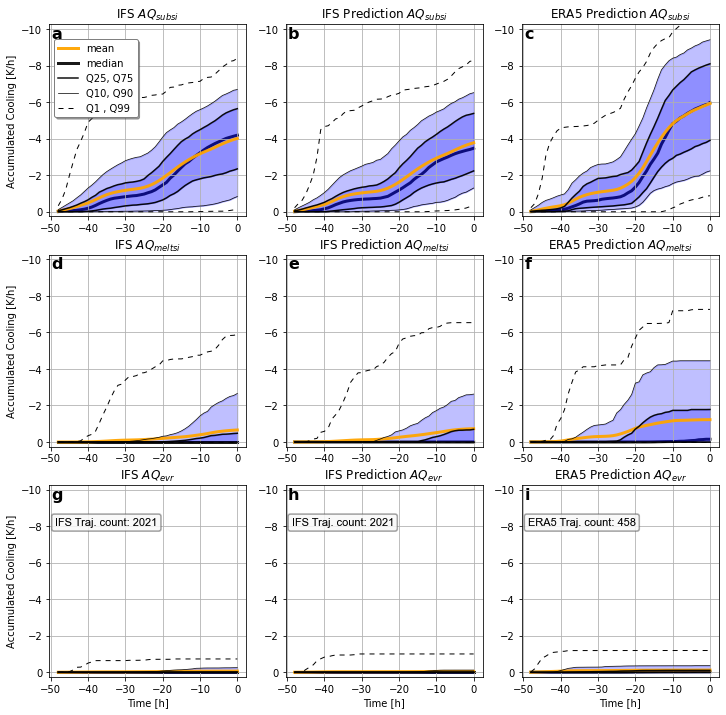

In [12]:

fig_path = '/home/freimax/msc_thesis/figures/thesis_msc/Chapter_casestudy/IFS_ERA_timeseries.png'
make_plots_traj.plot_time_series(
                                df_tr_ifs=df_traj_ifs, 
                                df_tr_era=df_traj_era,
                                save_fig=fig_path)

Figure is saved


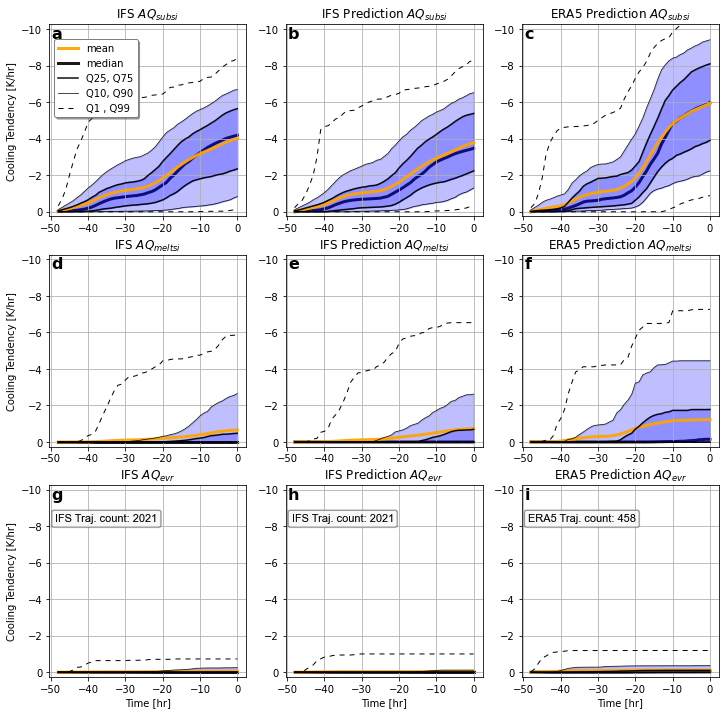

#### Ivestigate the origion of the trajectories

In [74]:
min_slp_location = ds_ifs.SLP.isel(time=2).where(ds_ifs.SLP.isel(time=2) == min_slp_value, drop=True)
min_lon = np.round(min_slp_location.lon.values[0],1)
min_lat = np.round(min_slp_location.lat.values[0],1)
print(f'Min SLP is at lon: {min_lon}, latitude: {min_lat}')

Min SLP is at lon: 163.2, latitude: 47.20000076293945


In [48]:
## Quadrants approach
df_traj_ifs

,time,lon,lat,p,tmeltsi_pred,tsubsi_pred,tevr_pred,Atmeltsi_pred,Atsubsi_pred,Atevr_pred,...,OMEGA,RH,SIWC,NOBCP_FLAG,date,month,id_CYC,Atsubsi_resid,Atmeltsi_resid,Atevr_resid
0,-48.0,175.64,58.61,991.0,0.0,-0.055509,0.0,0.000000,-0.055509,0.0,...,-0.053,56.278,0.002,0.0,20170410_16,APR17,1.0,-0.009491,0.000000,0.0
1,-47.0,174.83,58.61,989.0,0.0,-0.051598,0.0,0.000000,-0.107107,0.0,...,-0.025,58.888,0.002,0.0,20170410_16,APR17,1.0,-0.007893,0.000000,0.0
2,-46.0,173.96,58.58,989.0,0.0,-0.086693,0.0,0.000000,-0.193800,0.0,...,-0.006,60.860,0.004,0.0,20170410_16,APR17,1.0,-0.003200,0.000000,0.0
3,-45.0,173.04,58.51,989.0,0.0,-0.128868,0.0,0.000000,-0.322668,0.0,...,-0.001,63.412,0.007,0.0,20170410_16,APR17,1.0,-0.007332,0.000000,0.0
4,-44.0,172.12,58.38,989.0,0.0,-0.185451,0.0,0.000000,-0.508120,0.0,...,0.007,64.582,0.012,0.0,20170410_16,APR17,1.0,-0.011880,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99024,-4.0,163.58,46.82,707.0,0.0,-0.036848,0.0,-0.000064,-7.213228,0.0,...,-0.077,78.381,0.015,0.0,20170410_16,APR17,1.0,1.172228,0.000064,0.0
99025,-3.0,164.10,47.43,705.0,0.0,-0.072320,0.0,-0.000064,-7.285548,0.0,...,0.002,79.759,0.024,0.0,20170410_16,APR17,1.0,1.148548,0.000064,0.0
99026,-2.0,164.37,47.97,706.0,0.0,-0.024835,0.0,-0.000064,-7.310383,0.0,...,0.120,79.184,0.007,0.0,20170410_16,APR17,1.0,1.134383,0.000064,0.0
99027,-1.0,164.45,48.43,709.0,0.0,-0.010231,0.0,-0.000064,-7.320615,0.0,...,0.144,74.220,0.002,0.0,20170410_16,APR17,1.0,1.125615,0.000064,0.0


---
### Evaluate ERA5 performance

In [32]:
## Using K-Means to cluster trajectories
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:

# Extract trajectories
# Assuming 'lat' and 'lon' are variable names in the dataset
lats = df_traj_era[df_traj_era['time']==-48]['lat'].values
lons = df_traj_era[df_traj_era['time']==-48]['lon'].values

# Reshape data for clustering
data = np.stack((lats, lons), axis=-1)
data_reshaped = data.reshape(data.shape[0], -1)



In [39]:
# Normalize data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_reshaped)

In [41]:
# Clustering
k = 4
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(data_normalized)

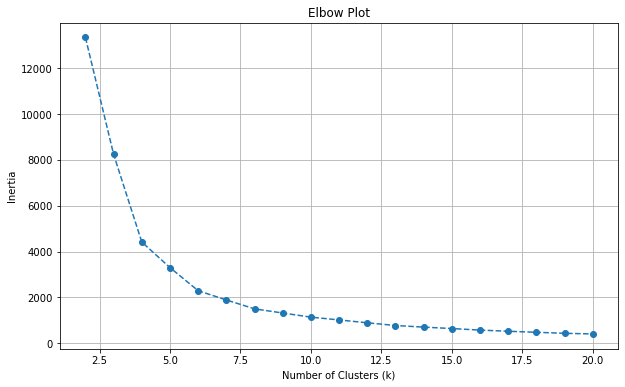

In [47]:
lats = df_traj_era[df_traj_era['time']==-48]['lat'].values
lons = df_traj_era[df_traj_era['time']==-48]['lon'].values

trastart_location = np.stack((lats, lons), axis=-1)
trastart_reshaped = trastart_location.reshape(trastart_location.shape[0], -1)

scaler = StandardScaler()
trastart_normalized = scaler.fit_transform(trastart_reshaped)

# Elbow plot
inertia = []
k_values = range(2, 21)  # From 2 to 20

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(trastart_normalized)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()

---
## DONT SHOW THESE PLOTS

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))

nr_points = plot_helpers.plot_modified_qq_plot(ax=axes[0], y_true=df_ifs_t0['Atmeltsi'], y_pred=df_ifs_t0['Atmeltsi_pred'], subsample_factor=1, unit='[K/48h]')
axes[0].set_title(r'$AQ_{tsubsi}$')

nr_points = plot_helpers.plot_modified_qq_plot(ax=axes[1], y_true=df_ifs_t0['Atsubsi'], y_pred=df_ifs_t0['Atsubsi_pred'], subsample_factor=1, show_ylabel=False, unit='[K/48h]')
axes[1].set_title(r'$AQ_{tmeltsi}$')

nr_points = plot_helpers.plot_modified_qq_plot(ax=axes[2], y_true=df_ifs_t0['Atevr'], y_pred=df_ifs_t0['Atevr_pred'], subsample_factor=1, show_ylabel=False, unit='[K/48h]')
axes[2].set_title(r'$AQ_{tevr}$')

# Add labels to each subplot
labels = ['a', 'b', 'c']
for ax, label in zip(axes, labels):
    ax.text(0.01, 1, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')

plt.savefig(f'{save_path}/QQplot.png',dpi=200)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(11.2,15))
hist_2d=[]

vmax = 10

## tsubsi
hist2d = make_plots_traj.plot_pred_vs_true(ax=ax[0,0], 
                                           y_true=df_ifs_t0['Atsubsi'], 
                                           y_pred=df_ifs_t0['Atsubsi_pred'], 
                                           vmax=vmax, 
                                           xaxis_label=False, xrange=-10, ylabel_bcp='Actual Cooling [K/48hr] (Accu sublimation)')

make_plots_traj.plot_residuals(ax[0,1], 
                               y_true=df_ifs_t0['Atsubsi'],
                               y_pred=df_ifs_t0['Atsubsi_pred'],
                               width_boxplot=1,
                               min_points_boxplot=10,
                               xaxis_label=False, xrange=-10, yrange=7, ylabel_bcp='Residual [K/48hr] (Accu sublimation)')
hist_2d.append(hist2d)

## tmeltsi
hist2d = make_plots_traj.plot_pred_vs_true(ax=ax[1,0], 
                                           y_true=df_ifs_t0['Atmeltsi'], 
                                           y_pred=df_ifs_t0['Atmeltsi_pred'],
                                           vmax=vmax,  
                                           xaxis_label=False, xrange=-10, ylabel_bcp='Actual Cooling [K/48hr] (Accu metling)')

make_plots_traj.plot_residuals(ax[1,1], 
                               y_true=df_ifs_t0['Atmeltsi'],
                               y_pred=df_ifs_t0['Atmeltsi_pred'],
                               width_boxplot=1,
                               min_points_boxplot=10,
                               xaxis_label=False, xrange=-10, yrange=7, ylabel_bcp='Residual [K/48hr] (Accu melting)')
hist_2d.append(hist2d)


## tevr
hist2d = make_plots_traj.plot_pred_vs_true(ax=ax[2,0], 
                                           y_true=df_ifs_t0['Atevr'], 
                                           y_pred=df_ifs_t0['Atevr_pred'], 
                                           vmax=vmax, 
                                           xaxis_label=True, unit='[K/48h]', xrange=-1.5, ylabel_bcp='Actual Cooling [K/48hr] (Accu evaporation)')

make_plots_traj.plot_residuals(ax[2,1], 
                               y_true=df_ifs_t0['Atevr'],
                               y_pred=df_ifs_t0['Atevr_pred'],
                               width_boxplot=0.25, 
                               min_points_boxplot=10,
                               xaxis_label=True, unit='[K/48h]', xrange=-3, yrange=2.5, ylabel_bcp='Residual [K/48hr] (Accu evaporation)')
hist_2d.append(hist2d)


## Colorbar
# if vmax >= 100:
cax = fig.add_axes([0.15, 0.07, 0.3, 0.0175]) # [left, bottom, width, height]
try:
    cbar_the = fig.colorbar(hist_2d[2][3], cax=cax, orientation='horizontal')#, pad=0.1, aspect=40)
except TypeError:
    cbar_the = fig.colorbar(hist_2d[2], cax=cax, orientation='horizontal')#, pad=0.1, aspect=40)
cbar_the.set_label('Counts')


# Add labels to each subplot
labels = [['a', 'b'], ['c', 'd'], ['e', 'f']]
for row in range(3):
    for col in range(2):
        label= labels[row][col]
        ax[row,col].text(0.01, 0.99, label, transform=ax[row,col].transAxes, fontsize=16, fontweight='bold', va='top')

plt.savefig(f'{save_path}/predVStrue_resid.png',dpi=250)